In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [96]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Basic Cleaning

In [97]:
df.columns = [col.lower().replace(' ', '_')for col in df.columns]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [98]:
df[df.duplicated()].shape[0]

0

In [99]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [100]:
categoricals = df.select_dtypes('object')
numericals = df.select_dtypes('number') 

### Feature Extraction

In [101]:
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [102]:
print(categoricals.apply(lambda col: col.unique()))

customer             [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state                [Washington, Arizona, Nevada, California, Oregon]
response                                                     [No, Yes]
coverage                                    [Basic, Extended, Premium]
education            [Bachelor, College, Master, High School or Bel...
effective_to_date    [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus     [Employed, Unemployed, Medical Leave, Disabled...
gender                                                          [F, M]
location_code                                 [Suburban, Rural, Urban]
marital_status                             [Married, Single, Divorced]
policy_type              [Corporate Auto, Personal Auto, Special Auto]
policy               [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                      [Offer1, Offer3, Offer2, Offer4]
sales_channel                        [Agent, Call Center, Web, Branch]
vehicl

In [103]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [104]:
categoricals = df.select_dtypes('object')
print(categoricals.apply(lambda col: col.unique()))

customer            [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state               [Washington, Arizona, Nevada, California, Oregon]
response                                                    [No, Yes]
coverage                                   [Basic, Extended, Premium]
education           [Bachelor, College, Master, High School or Bel...
employmentstatus    [Employed, Unemployed, Medical Leave, Disabled...
gender                                                         [F, M]
location_code                                [Suburban, Rural, Urban]
marital_status                            [Married, Single, Divorced]
policy_type             [Corporate Auto, Personal Auto, Special Auto]
policy              [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                     [Offer1, Offer3, Offer2, Offer4]
sales_channel                       [Agent, Call Center, Web, Branch]
vehicle_class       [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicle_size        

### Check the categorical features if anything can be dropped or maybe deconstructed

In [105]:
len(df['customer'].unique()) / df.shape[0] # check if customer is 100% unique

1.0

In [106]:
df.drop(['customer'], axis=1, inplace=True)

In [107]:
categoricals = df.select_dtypes('object')

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

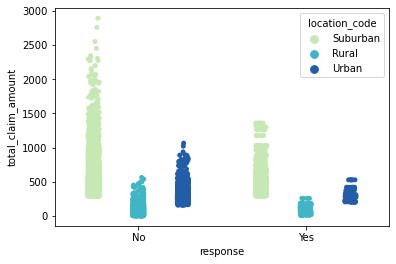

In [108]:
sns.stripplot(x="response", y="total_claim_amount", data=df, hue="location_code", palette="YlGnBu", dodge=True)

<AxesSubplot:xlabel='response', ylabel='count'>

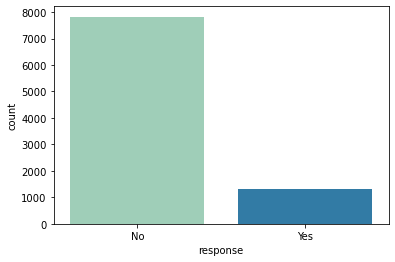

In [109]:
sns.countplot(x=df['response'], palette='YlGnBu')

- the feature 'response' does not seem to be relecant for this data set; unclear what meaning it contributes here

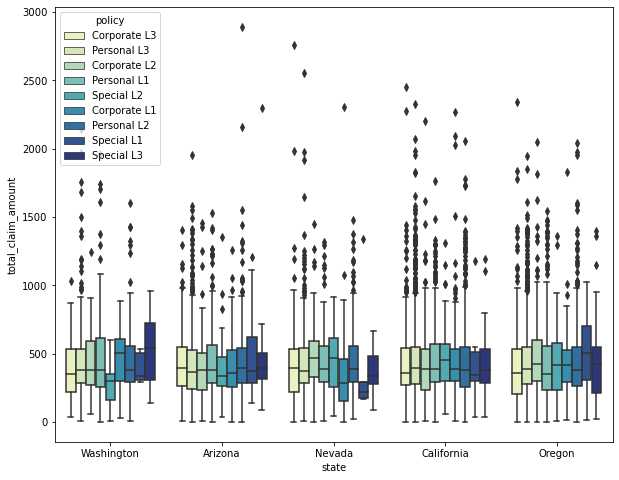

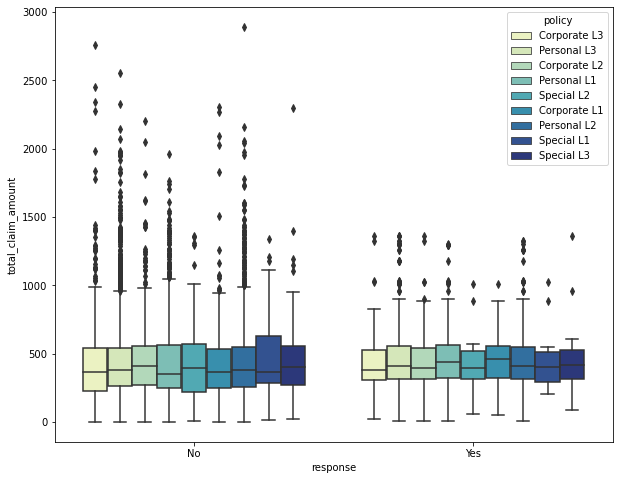

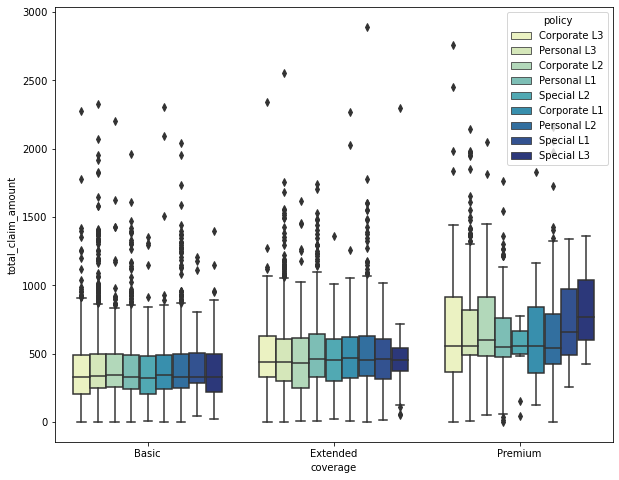

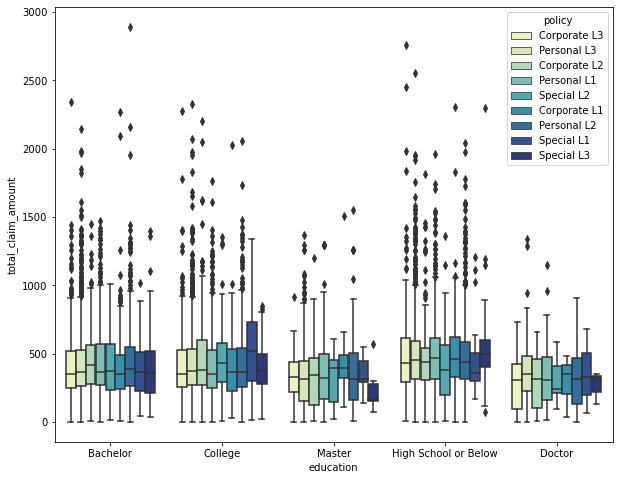

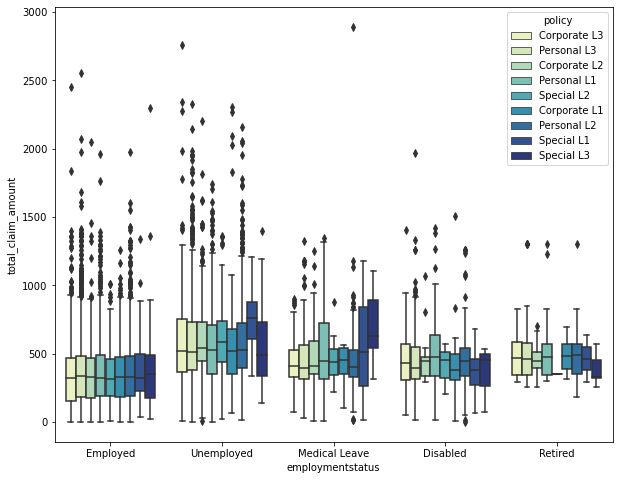

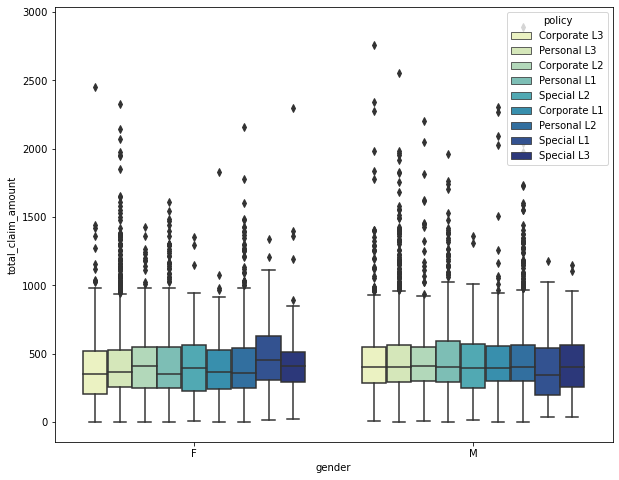

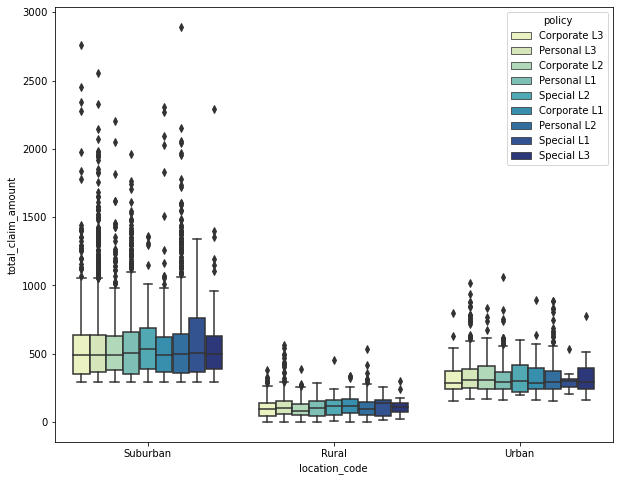

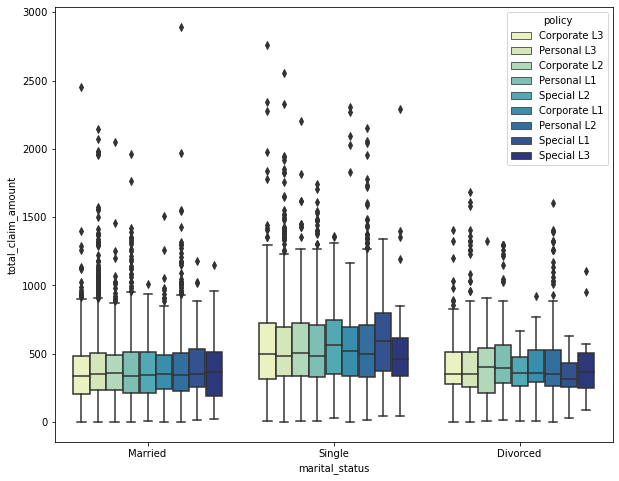

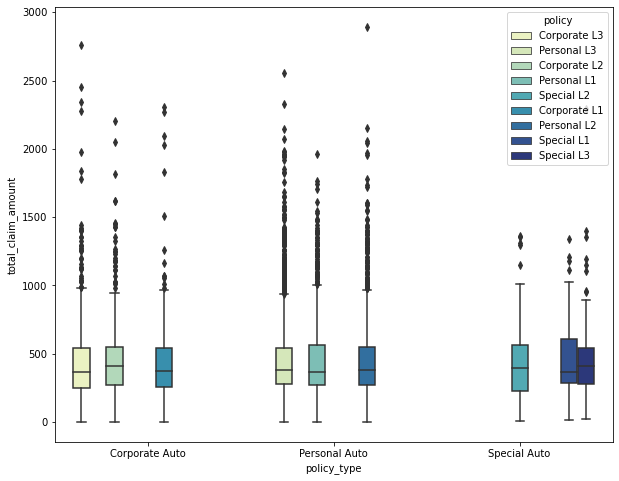

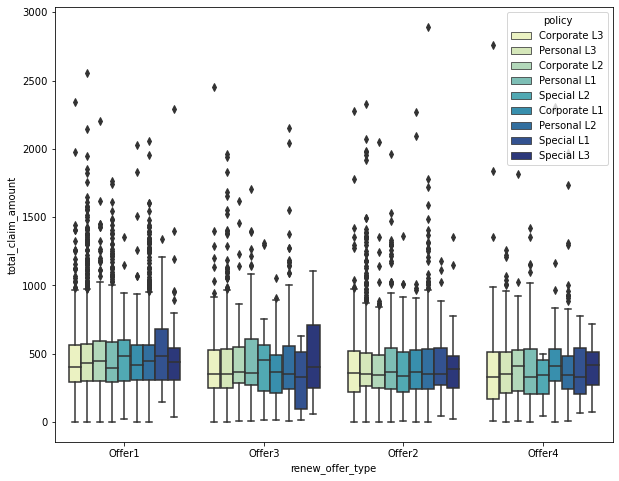

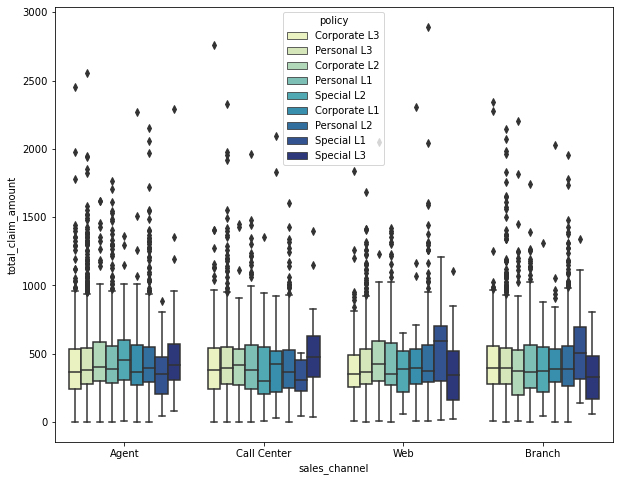

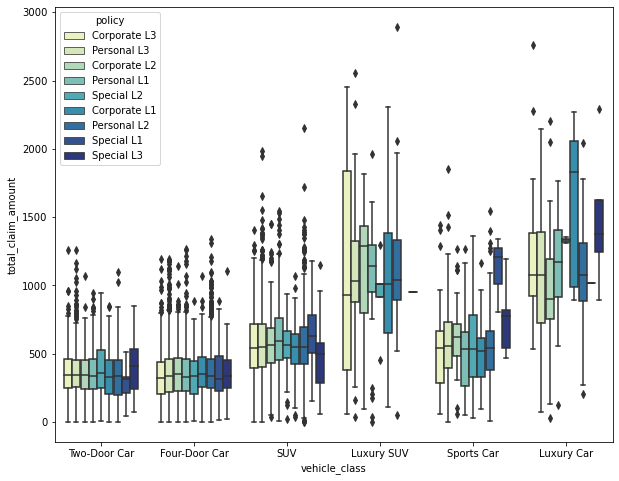

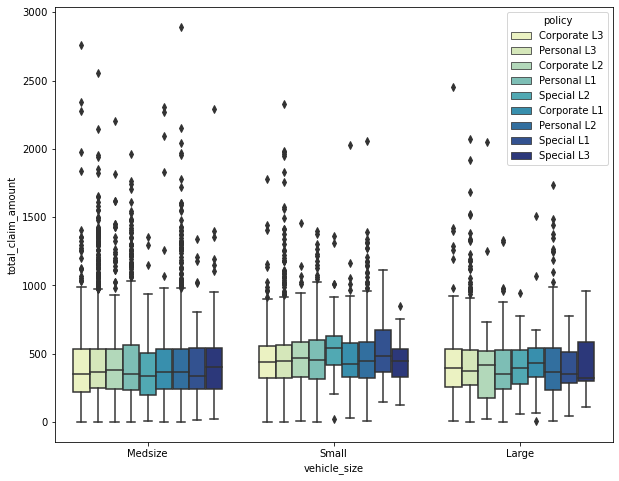

In [110]:
for col in categoricals:
    if col == 'policy':
        pass
    else:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.boxplot(x=col, y='total_claim_amount', hue='policy', data=df, palette='YlGnBu')
        plt.show()

In [111]:
# lets check the policy type and policy
policy_check_df = df[['policy_type', 'policy']]

In [112]:
policy_check_df['same_type'] = policy_check_df.apply(lambda x: (x['policy_type'].split(' ')[0] == x['policy'].split(' ')[0]), axis=1)

In [113]:
policy_check_df

,policy_type,policy,same_type
0,Corporate Auto,Corporate L3,True
1,Personal Auto,Personal L3,True
2,Personal Auto,Personal L3,True
3,Corporate Auto,Corporate L2,True
4,Personal Auto,Personal L1,True
...,...,...,...
9129,Personal Auto,Personal L1,True
9130,Corporate Auto,Corporate L3,True
9131,Corporate Auto,Corporate L2,True
9132,Personal Auto,Personal L2,True


In [114]:
# check if there are any row where the  policy type is not reflected in policy feature
policy_check_df[policy_check_df['same_type'] == 'False'].shape[0]

0

- based on the fact that the policy type is reflected in both 'policy' and 'policy_type' I want to drop this info from policy feature and see if this yields any better insights
- another approach would be to get rid of the 'policy_type' featzre since the info from it is reflected in 'policy'

In [115]:
df_alt = df
df['policy'] = [col.split(' ')[1] for col in df['policy']]

In [116]:
df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

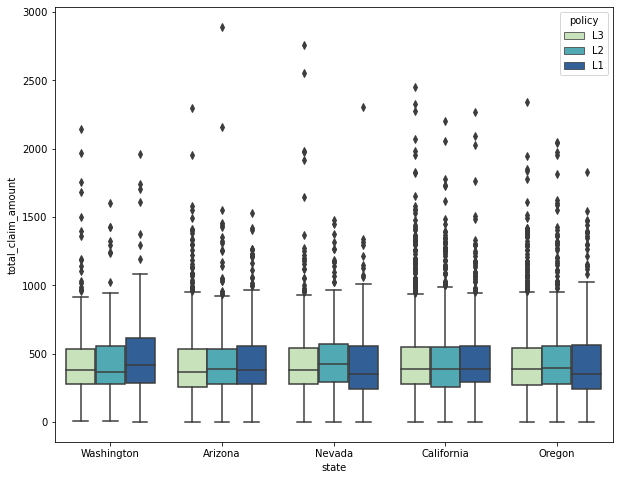

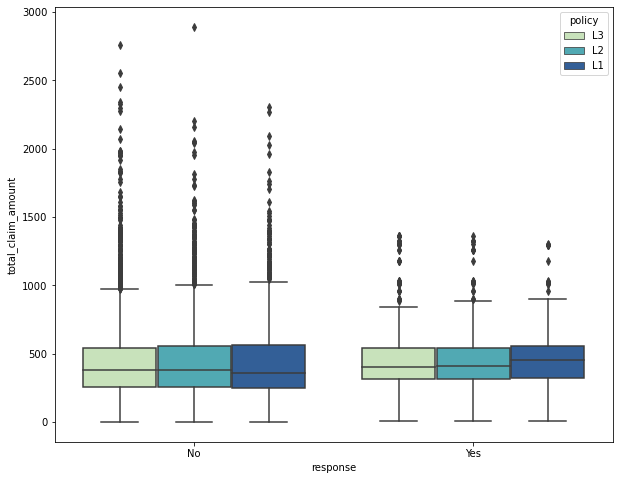

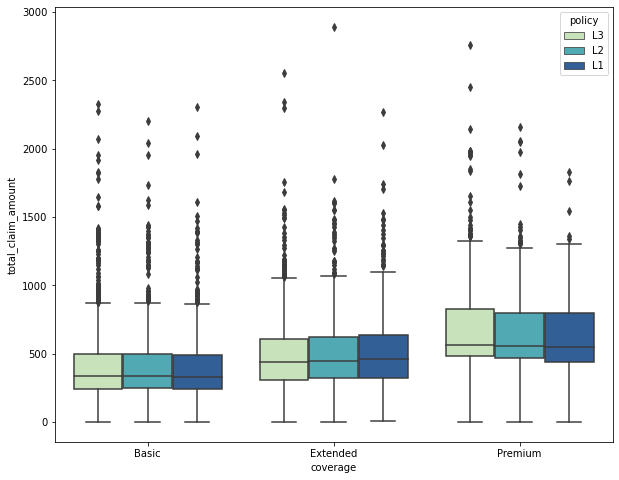

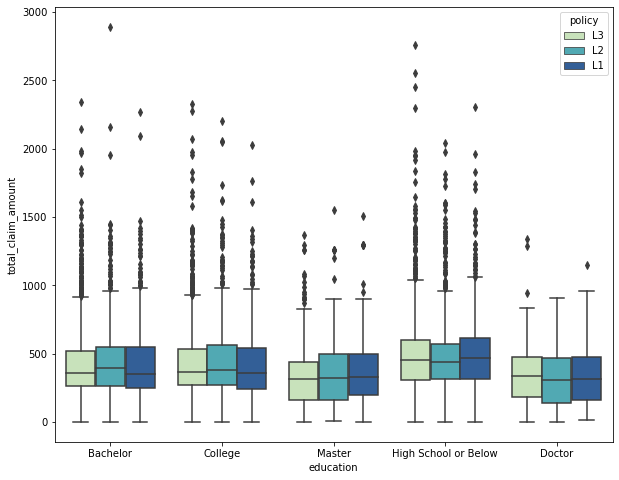

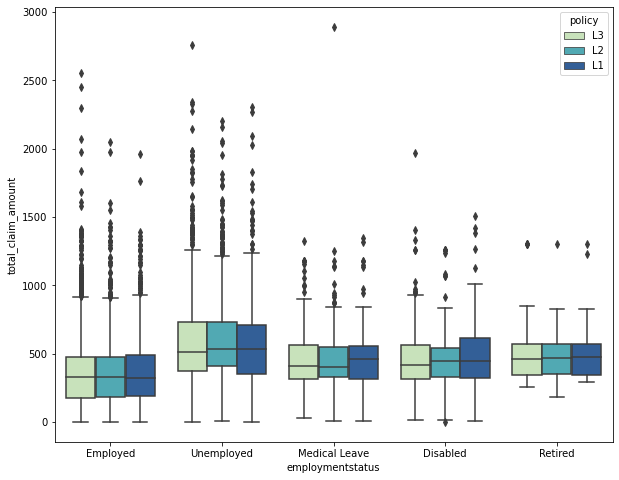

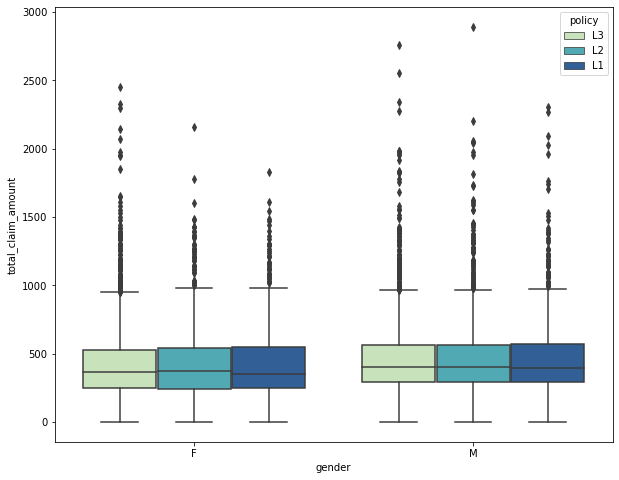

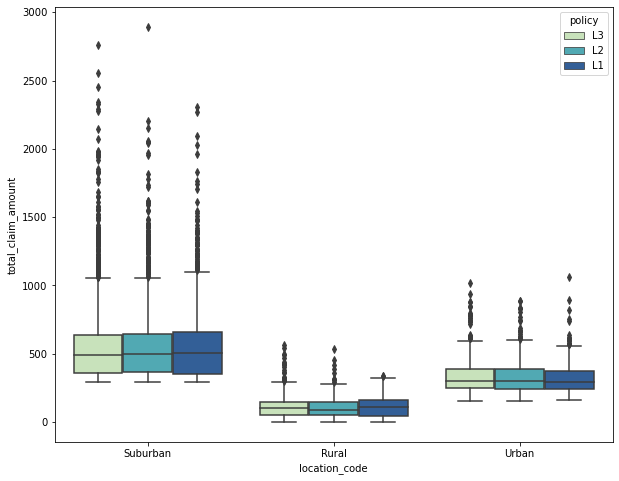

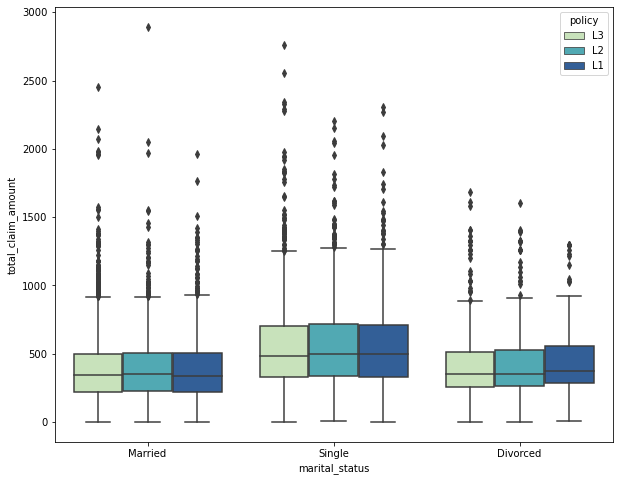

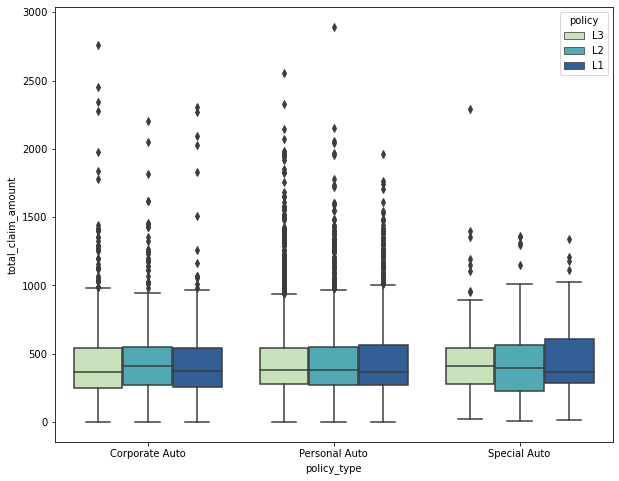

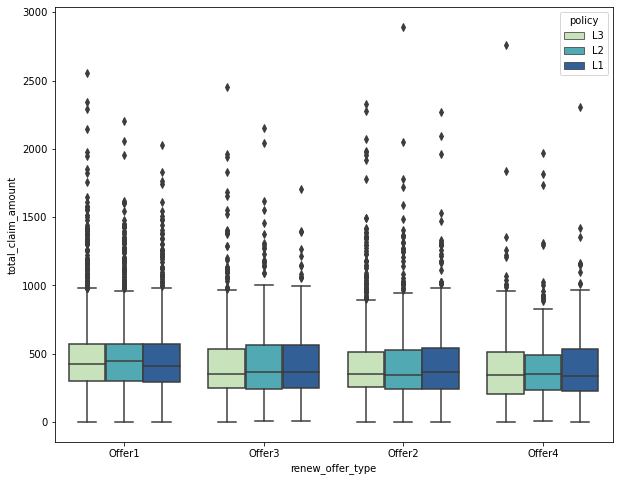

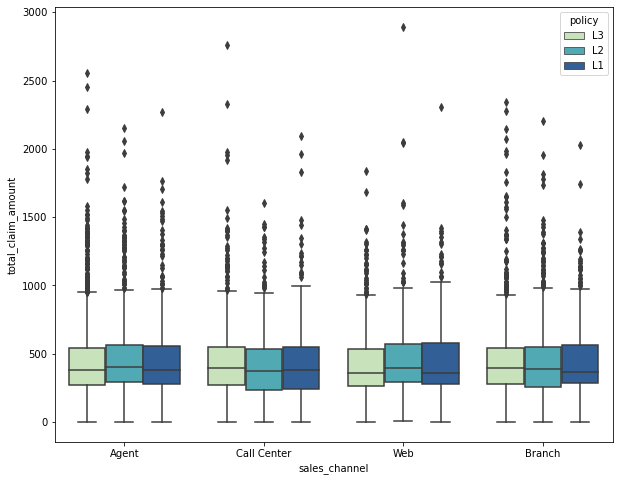

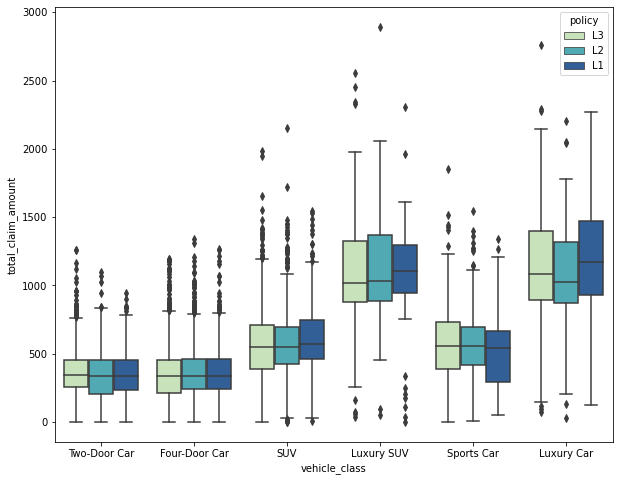

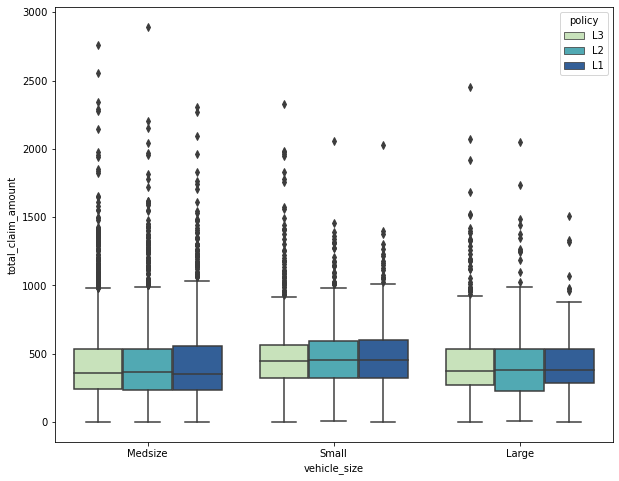

In [117]:
for col in categoricals:
    if col == 'policy':
        pass
    else:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.boxplot(x=col, y='total_claim_amount', hue='policy', data=df, palette='YlGnBu')
        plt.show()

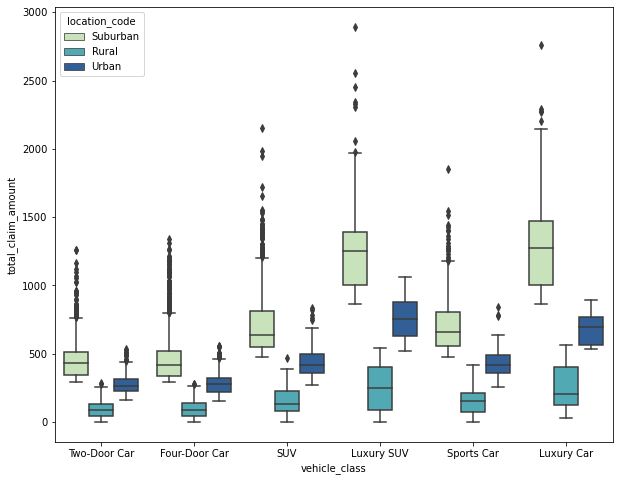

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='vehicle_class', y='total_claim_amount', hue='location_code', data=df, palette='YlGnBu')
plt.show()

In [89]:
df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

- Possibility: I could combine 'Luxury Car' and 'Luxury SUV' to "increase" data representation for the 'Luxury' category

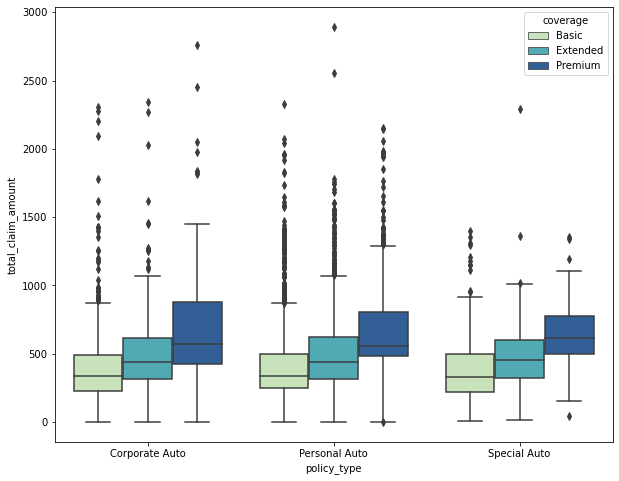

In [119]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='policy_type', y='total_claim_amount', hue='coverage', data=df, palette='YlGnBu')
plt.show()

In [120]:
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [121]:
df['effective_to_year'] = df['effective_to_date'].dt.year
df['effective_to_month'] = df['effective_to_date'].dt.month
df['effective_to_day'] = df['effective_to_date'].dt.day

In [124]:
print(df['effective_to_year'].unique())
print(df['effective_to_month'].unique())
print(df['effective_to_day'].unique())

[2011]
[2 1]
[24 31 19 20  3 25 18 26 17 21  6 10  5 27 14 29 28 12  2  7 22 13 15  8
 11 23 16  9  4  1 30]


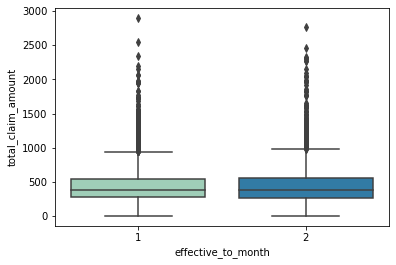

In [130]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='effective_to_month', y='total_claim_amount', data=df, palette='YlGnBu')
plt.show()

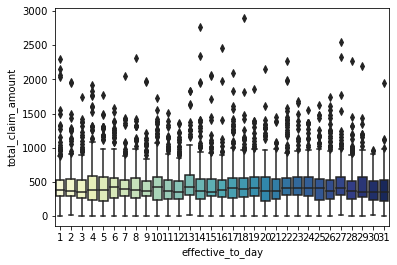

In [131]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='effective_to_day', y='total_claim_amount', data=df, palette='YlGnBu')
plt.show()

### Summary:
- I would drop the 'effective_to_XX' features since there seems to be no added value in them
- I would drop the customer feature since this is a unique internal id for customer
- I would drop reposnse feature since no relevant info is encoded here
- I would either drop pplicy_type or keep it and transform policy feature to only reflect L1, L2, L3
- I would also maybe combine in feature vehicle_class the categories Luxury Car and Luxury SUV